In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df1 = pd.read_csv('../CPI_Clean/LA_CPI_DEC-APR20.csv')
df2 = pd.read_csv('../CPI_Clean/RS_CPI_SEP-MAR20.csv')
df3 = pd.read_csv('../CPI_Clean/SD_CPI_SEP-MAR20.csv')
df4 = pd.read_csv('../CPI_Clean/SF_CPI_OCT-APR20.csv')

In [3]:
lacpi = df1.loc[:,['Item and Group', 'Inflation Change JAN->MAR']]
sfcpi = df4.loc[:,['Item and Group', 'Inflation Change FEB->APR']]
sdcpi = df3.loc[:,['Item and Group', 'Inflation Change JAN->MAR']]
rscpi = df2.loc[:,['Item and Group', 'Inflation Change JAN->MAR']]
sfcpi.columns = ['Item and Group', 'Inflation Change JAN->MAR']

In [8]:
lacpi

,Item and Group,Inflation Change JAN->MAR
2,Cereals and bakery products,-0.728135
3,"Meats, poultry, fish, and eggs",0.171915
4,Dairy and related products,-2.281617
5,Fruits and vegetables,0.710403


In [5]:

rscpi = rscpi.loc[[2,3,4,5],:]
lacpi = lacpi.loc[[2,3,4,5],:]
sdcpi = sdcpi.loc[[2,3,4,5],:]
sfcpi = sfcpi.loc[[2,3,4,5],:]

In [6]:
frames = [lacpi, sfcpi, rscpi,sdcpi]
result = pd.concat(frames)
result.insert(0, "City_Name", ['LosAngeles_CPI', 'LosAngeles_CPI', 'LosAngeles_CPI', 'LosAngeles_CPI', 'SanFranscisco_CPI', 'SanFranscisco_CPI', 'SanFranscisco_CPI', 'SanFranscisco_CPI', 'Riverside_CPI', 'Riverside_CPI', 'Riverside_CPI', 'Riverside_CPI', 'SanDiego_CPI', 'SanDiego_CPI', 'SanDiego_CPI', 'SanDiego_CPI'], True)
result = result.reset_index(drop=True)
result = result.reindex([1, 7, 8, 14, 5, 9, 13, 3, 11, 15, 0, 4, 12, 2, 6, 10])
result = result.reset_index(drop=True)

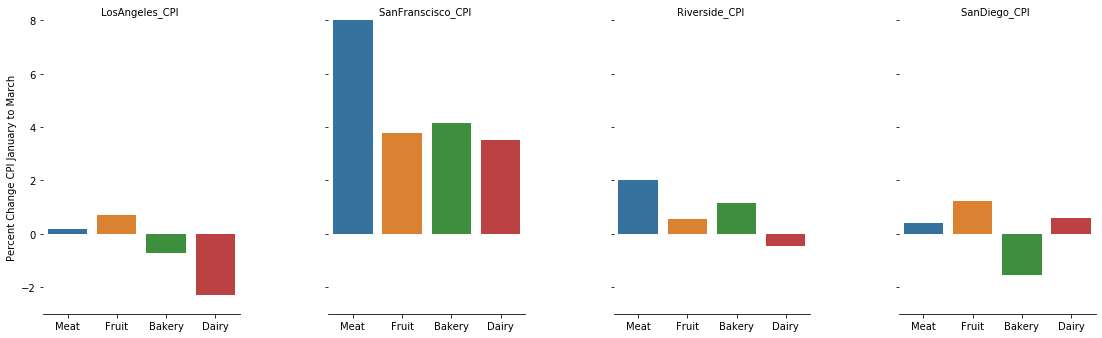

In [7]:
  g = sns.catplot(x="Item and Group", y="Inflation Change JAN->MAR", col="City_Name",
                data=result, saturation=.7,
                 kind="bar", ci=None, aspect=0.8)

(g.set_axis_labels("", "Percent Change CPI January to March")
   .set_xticklabels(["Meat", "Fruit", "Bakery","Dairy"])
   .set_titles("{col_name} ")
   .set(ylim=(-3, 8))
   .despine(left=True)) 